# INFO1998 Group Project: Supermarket Sales

By Amy Zhang, Raymond Zhang, Krystal Yan

In the summer, the group mates all traveled around the States, in our conversation, we discovered that the market prices of many products seem to be very different on the two coasts. Sharing our confusion, we found a dataset on supermarket orders across the entire country on Kaggle: <https://www.kaggle.com/datasets/abiodunonadeji/united-state-superstore-sales?resource=download>, and decided to look into the prices, sales and profits of supermarket orders in different regions of United States. And that spoiled our research question: 
\
**How will regions affect the sales and profits?** \
We plan to develop two machine learning models to investigate how different factors would affect the sales and profits of a product. We first will look at how regions affect the sales and profits of a specific category of product using a KNN model, then we will use a regression model to predict the profits based on the sales in a specific region.
With visualizations, we hope to conclude a trend and compare the different sales/profit performances in different regions, and provide some insight into the cause of this trend.

Our hypothesis is that the west region may have a higher sales on expensive products such as technology products, and its profit would be high because west coast has a huge population and a wealthy economy relying on tech companies. People residing and working in tech companies tend to have higher income and would like to spend more in technology products. And since most of the tech companies producing those tech products are located in the west, and California is the greatest manufacturing state in the States, most of the products are probably produced in this region or nearby (closest to the Asian manufacturing bases). Therefore, the production/transportation expenses would be lower resulting in higher profit.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Part 0: Raw Data

### Data Cleaning and Manipulation
Before any model is built or any analysis is done, we need to first clean up the messy raw data.

In [2]:
df = pd.read_excel('supermarket_data.xls')

#Drop unecessary information that cannot be used for analysis
df=df.drop('Row ID',axis=1)
df=df.drop('Order ID', axis=1)
df=df.drop('Customer ID', axis=1)
df=df.drop('Customer Name', axis=1)
df=df.drop('Product ID',axis=1)
df=df.drop('Product Name',axis=1)

#Change region into dummy vairiables
df['Central']=0
df['South']=0
df['West']=0
df['East']=0
for x in range(0,len(df)):
    if df['Region'][x]=='Central':
        df['Central'][x]=1
    elif df['Region'][x]=='South':
        df['South'][x]=1
    elif df['Region'][x]=='West':
        df['West'][x]=1
    elif df['Region'][x]=='East':
        df['East'][x]=1

<ipython-input-2-e0bb718a9479>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['South'][x]=1
<ipython-input-2-e0bb718a9479>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['West'][x]=1
<ipython-input-2-e0bb718a9479>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Central'][x]=1
<ipython-input-2-e0bb718a9479>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

To get more detailed analysis on different regions, we manipulate the variable "States" and make it quantifiable.

In [3]:
#Abbreviate the state names
df['State_ab']= ''
state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
df["State_ab"] = df.State.map(state_to_abbrev)

#Encode the states according to population ranking
df['State_pop']= ''
state_to_population_ranking_encoding = {
"CA": 52, "TX": 51, "FL": 50, "NY": 49, "PA": 48, "IL": 47,
"OH": 46, "GA": 45, "NC": 44, "MI": 43, "NJ": 42, "VA": 41,
"WA": 40, "AZ": 39, "TN": 38, "MA": 37, "IN": 36, "MO": 35,
"MD": 34, "CO": 33, "WI": 32, "MN": 31, "SC": 30, "AL": 29,
"LA": 28, "KY": 27, "OR": 26, "OK": 25, "CT": 24, "UT": 23,
"PR": 22, "NV": 21, "IA": 20, "AR": 19, "MS": 18, "KS": 17,
"NM": 16, "NE": 15, "ID": 14, "WV": 13, "HI": 12, "NH": 11,
"ME": 10, "MT": 9, "RI": 8, "DE": 7, "SD": 6, "ND": 5,
"AK": 4, "DC": 3, "VT": 2, "WY": 1
}
df["State_pop"] = df.State_ab.map(state_to_population_ranking_encoding)

In [4]:
df.head()

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,...,Sales,Quantity,Discount,Profit,Central,South,West,East,State_ab,State_pop
0,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,261.9600,2,0.00,41.9136,0,1,0,0,KY,27
1,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,731.9400,3,0.00,219.5820,0,1,0,0,KY,27
2,2016-06-12,2016-06-16,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,...,14.6200,2,0.00,6.8714,0,0,1,0,CA,52
3,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,...,957.5775,5,0.45,-383.0310,0,1,0,0,FL,50
4,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,...,22.3680,2,0.20,2.5164,0,1,0,0,FL,50


### Raw Data Visualization

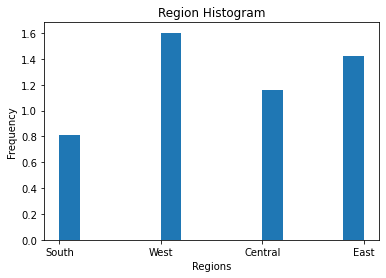

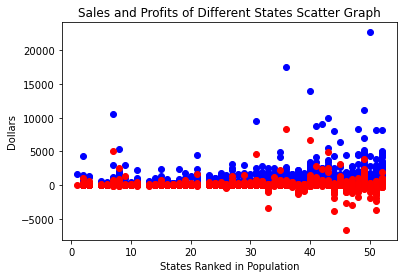

In [5]:
#Frequency of Different Regions
plt.hist(df['Region'],bins=15,density=True)
plt.title('Region Histogram')
plt.xlabel('Regions')
plt.ylabel('Frequency')
plt.show()

#Scatter of Sales and Profit of Different States
plt.plot(df['State_pop'], df['Sales'], 'bo')
plt.plot(df['State_pop'], df['Profit'], 'ro') 
plt.title('Sales and Profits of Different States Scatter Graph')
plt.xlabel('States Ranked in Population')
plt.ylabel('Dollars')

plt.show()

From the visualization we could already see some potential relationships and patterns such as people living on the coasts tend to consume more than people living inland and states with larger populations tend to have higher consumption resulting in higher sales and profit.

## Part 1: KNN model investigating the relationship between sales, profit, region and product category

In [6]:
#Dummy encoding sales per quantity for each order
df['Sales per Quantity'] = 0
df['Profit per Quantity'] = 0
for x in range(0, len(df)):
    sales_per_quantity = df['Sales'][x]/df['Quantity'][x]
    profit_per_quantity = df['Profit'][x]/df['Quantity'][x]
    df['Sales per Quantity'][x]=sales_per_quantity
    df['Profit per Quantity'][x]=profit_per_quantity
df.head()

<ipython-input-6-e227ef85b651>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales per Quantity'][x]=sales_per_quantity
<ipython-input-6-e227ef85b651>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Profit per Quantity'][x]=profit_per_quantity


,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,...,Discount,Profit,Central,South,West,East,State_ab,State_pop,Sales per Quantity,Profit per Quantity
0,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,0.00,41.9136,0,1,0,0,KY,27,130,20
1,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,0.00,219.5820,0,1,0,0,KY,27,243,73
2,2016-06-12,2016-06-16,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,...,0.00,6.8714,0,0,1,0,CA,52,7,3
3,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,...,0.45,-383.0310,0,1,0,0,FL,50,191,-76
4,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,...,0.20,2.5164,0,1,0,0,FL,50,11,1


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Region"] = le.fit_transform(df["Region"])

#Category: everything

#Separate target and feature
target = df[["Region"]]
feature = df[["Sales per Quantity", "Profit per Quantity"]]

#Train test split data with 20% being used for testing
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

#Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

#KNN model
model_knn = KNeighborsClassifier()

#Fit the model using the train data
model_knn.fit(x_train, y_train)

#Store the predictions for the test sets
predictions_every = model_knn.predict(x_test)

print("accuracy score:", accuracy_score(y_test, predictions_every)) 

accuracy score: 0.34517258629314657


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


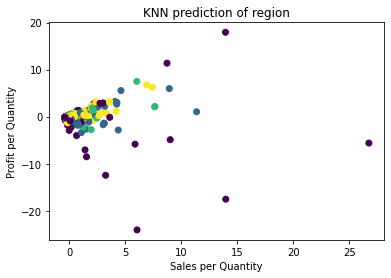

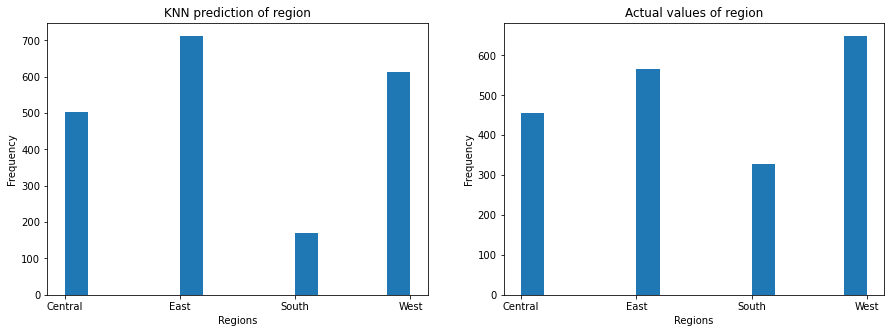

In [8]:
# Visualization of category:everything
plt.scatter(x_test[:,0], x_test[:,1], c=predictions_every)
plt.title('KNN prediction of region')
plt.xlabel('Sales per Quantity')
plt.ylabel('Profit per Quantity')

plt.subplots(figsize=(15, 5))
plt.subplot(121)
plt.hist(predictions_every,bins=15)
plt.title('KNN prediction of region')
plt.xticks([0,1,2,3],['Central','East','South','West'])
plt.xlabel('Regions')
plt.ylabel('Frequency')
plt.subplot(122)
plt.hist(y_test,bins=15)
plt.title('Actual values of region')
plt.xticks([0,1,2,3],['Central','East','South','West'])
plt.xlabel('Regions')
plt.ylabel('Frequency')

plt.show()

In [9]:
#Category: furniture

df_f = df[df["Category"]=="Furniture"]
df_f.head()

#Separate target and feature
target_f = df_f[["Region"]]
feature_f = df_f[["Sales per Quantity", "Profit per Quantity"]]

#Train test split data with 20% being used for testing
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(feature_f, target_f, test_size=0.2, random_state=42)

#Scaling
sc = StandardScaler()
sc.fit(x_train_f)
x_train_f = sc.transform(x_train_f)
x_test_f = sc.transform(x_test_f)

#KNN model
model_f = KNeighborsClassifier()

#Fit the model using the train data
model_f.fit(x_train_f, y_train_f)

#Store the predictions for the test sets
predictions_f = model_f.predict(x_test_f)

print("accuracy score:", accuracy_score(y_test_f, predictions_f)) 

accuracy score: 0.43529411764705883


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


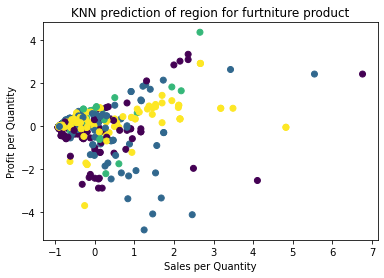

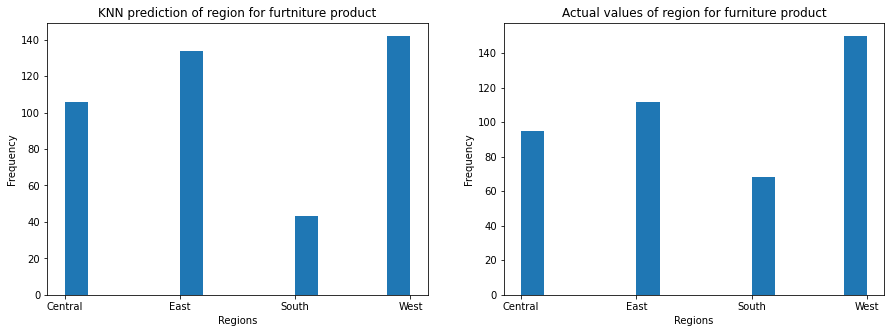

In [10]:
# Visualization of category:furniture
plt.scatter(x_test_f[:,0], x_test_f[:,1], c=predictions_f)
plt.title('KNN prediction of region for furtniture product')
plt.xlabel('Sales per Quantity')
plt.ylabel('Profit per Quantity')

plt.subplots(figsize=(15, 5))
plt.subplot(121)
plt.hist(predictions_f,bins=15)
plt.title('KNN prediction of region for furtniture product')
plt.xticks([0,1,2,3],['Central','East','South','West'])
plt.xlabel('Regions')
plt.ylabel('Frequency')
plt.subplot(122)
plt.hist(y_test_f,bins=15)
plt.title('Actual values of region for furniture product')
plt.xticks([0,1,2,3],['Central','East','South','West'])
plt.xlabel('Regions')
plt.ylabel('Frequency')

plt.show()

In [11]:
#Category: office supplies

df_os = df[df["Category"]=="Office Supplies"]
df_os.head()

#Separate target and feature
target_os = df_os[["Region"]]
feature_os = df_os[["Sales per Quantity", "Profit per Quantity"]]

#Train test split data with 20% being used for testing
x_train_os, x_test_os, y_train_os, y_test_os = train_test_split(feature_os, target_os, test_size=0.2, random_state=42)

#Scaling
sc = StandardScaler()
sc.fit(x_train_os)
x_train_os = sc.transform(x_train_os)
x_test_os = sc.transform(x_test_os)

#KNN model
model_os = KNeighborsClassifier()

#Fit the model using the train data
model_os.fit(x_train_os, y_train_os)

#Store the predictions for the test sets
predictions_os = model_os.predict(x_test_os)

print("accuracy score:", accuracy_score(y_test_os, predictions_os)) 

accuracy score: 0.33167495854063017


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


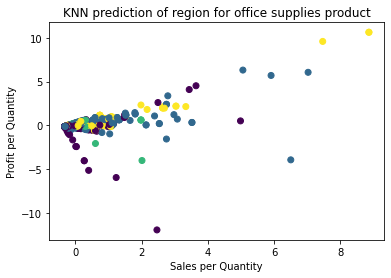

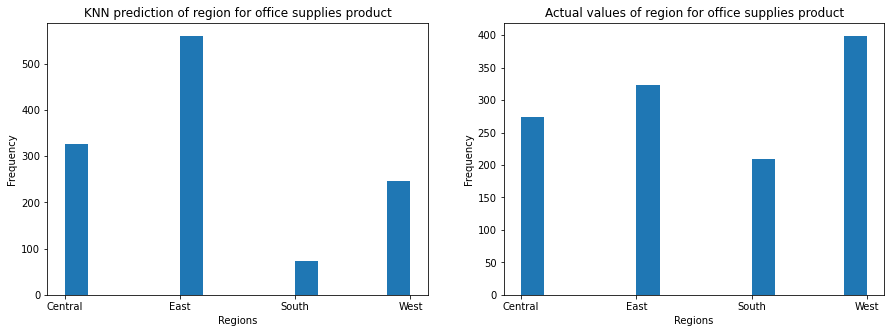

In [12]:
# Visualization of category:office supplies
plt.scatter(x_test_os[:,0], x_test_os[:,1], c=predictions_os)
plt.title('KNN prediction of region for office supplies product')
plt.xlabel('Sales per Quantity')
plt.ylabel('Profit per Quantity')

plt.subplots(figsize=(15, 5))
plt.subplot(121)
plt.hist(predictions_os,bins=15)
plt.title('KNN prediction of region for office supplies product')
plt.xticks([0,1,2,3],['Central','East','South','West'])
plt.xlabel('Regions')
plt.ylabel('Frequency')
plt.subplot(122)
plt.hist(y_test_os,bins=15)
plt.title('Actual values of region for office supplies product')
plt.xticks([0,1,2,3],['Central','East','South','West'])
plt.xlabel('Regions')
plt.ylabel('Frequency')

plt.show()

In [13]:
#Category: technology

df_t = df[df["Category"]=="Technology"]
df_t.head()

#Separate target and feature
target_t = df_t[["Region"]]
feature_t = df_t[["Sales per Quantity", "Profit per Quantity"]]

#Train test split data with 20% being used for testing
x_train_t, x_test_t, y_train_t, y_test_t = train_test_split(feature_t, target_t, test_size=0.2, random_state=42)

#Scaling
sc = StandardScaler()
sc.fit(x_train_t)
x_train_t = sc.transform(x_train_t)
x_test_t = sc.transform(x_test_t)

#KNN model
model_t = KNeighborsClassifier()

#Fit the model using the train data
model_t.fit(x_train_t, y_train_t)

#Store the predictions for the test sets
predictions_t = model_t.predict(x_test_t)

print("accuracy score:", accuracy_score(y_test_t, predictions_t)) 

accuracy score: 0.35135135135135137


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


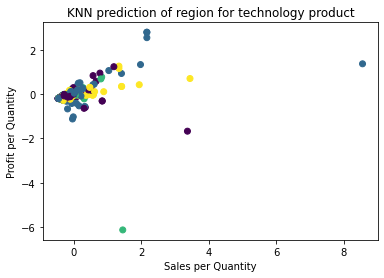

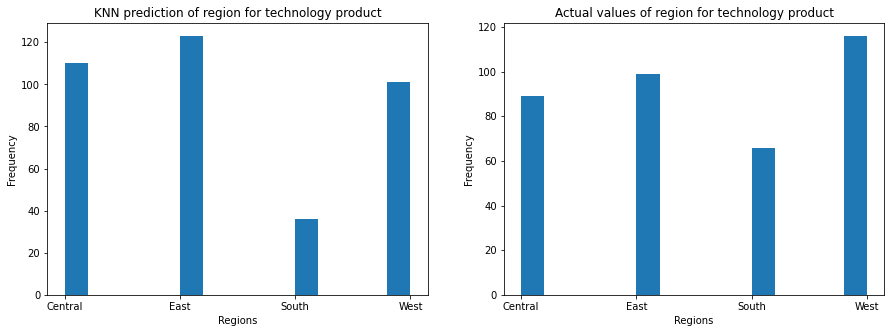

In [14]:
# Visualization of category:technology
plt.scatter(x_test_t[:,0], x_test_t[:,1], c=predictions_t)
plt.title('KNN prediction of region for technology product')
plt.xlabel('Sales per Quantity')
plt.ylabel('Profit per Quantity')

plt.subplots(figsize=(15, 5))
plt.subplot(121)
plt.hist(predictions_t,bins=15)
plt.title('KNN prediction of region for technology product')
plt.xticks([0,1,2,3],['Central','East','South','West'])
plt.xlabel('Regions')
plt.ylabel('Frequency')
plt.subplot(122)
plt.hist(y_test_t,bins=15)
plt.title('Actual values of region for technology product')
plt.xticks([0,1,2,3],['Central','East','South','West'])
plt.xlabel('Regions')
plt.ylabel('Frequency')

plt.show()

KNN is used to predict the region where an order of a specific product comes from. In the models that we have constructed, first products of all categories were used as the feature, and then products from each category (furniture, office supplies, and technologies) were selected and used as features for their corresponding models. This is why four separate models were constructed for this part of our project. Because orders differ on their quantities of products purchased, we used "sales per quantity" and "profit per quantity" as the feature, and "region" as the target. At the end of each model, their accuracy score was calculated. The results range from 0.32 to 0.44, which indicates that there is a lack of accuracy in the predictions made by the models. In other words, there is not a strong correlation between the sales/profit of a product and where the order is made. One possible explanation for this lack of accuracy is that the price of furniture, office supply, and technology products are rather consistent across the country.

## Part 2: Regression predicting profit based on sales in different region


In [16]:
from sklearn.linear_model import LinearRegression
#Predit profit based on sales in deiffernt region
#West
df_r= df[df['West']==1]
X = df_r[['Sales']]
Y = df_r[['Profit']]
x_train_west, x_test_west, y_train_west, y_test_west = train_test_split(X, Y, test_size=0.2, random_state=42)

#linear Regression model
model_west = LinearRegression()

#Fit the model using the train data
model_west.fit(x_train_west, y_train_west)

#Store the predictions for the test sets
prediction_west = model_west.predict(x_test_west)

print("score:", model_west.score(y_test_west, prediction_west)) 

score: -0.22319223452612302


Text(0, 0.5, 'Profit')

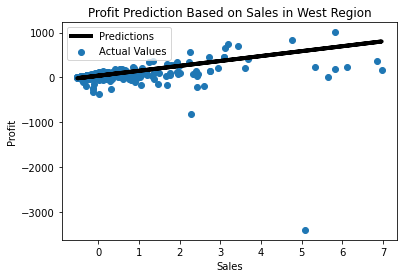

In [17]:
# Visualization of profit prediction based on sales in west region

#Scaling
sc.fit(x_test_west)
x_test_west = sc.transform(x_test_west)

plt.scatter(x_test_west, y_test_west)
plt.plot(x_test_west, prediction_west, 'k', linewidth=4)
plt.legend(["Predictions","Actual Values"])
plt.title('Profit Prediction Based on Sales in West Region')
plt.xlabel('Sales')
plt.ylabel('Profit')

In [18]:
#East
df_r= df[df['East']==1]
X = df_r[['Sales']]
Y = df_r[['Profit']]
x_train_east, x_test_east, y_train_east, y_test_east = train_test_split(X, Y, test_size=0.2, random_state=42)

#linear Regression model
model_east = LinearRegression()

#Fit the model using the train data
model_east.fit(x_train_east, y_train_east)

#Store the predictions for the test sets
prediction_east = model_east.predict(x_test_east)

print("score:", model_east.score(y_test_east, prediction_east)) 

score: 0.08453509200911336


Text(0, 0.5, 'Profit')

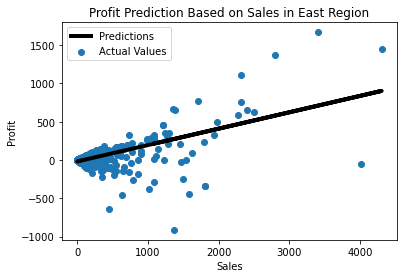

In [19]:
# Visualization of profit prediction based on sales in east region
#Scaling
sc.fit(x_test_east)
x_test_west = sc.transform(x_test_east)

plt.scatter(x_test_east, y_test_east)
plt.plot(x_test_east, prediction_east, 'k', linewidth=4)
plt.legend(["Predictions","Actual Values"])
plt.title('Profit Prediction Based on Sales in East Region')
plt.xlabel('Sales')
plt.ylabel('Profit')

In [20]:
#South
df_r= df[df['South']==1]
X = df_r[['Sales']]
Y = df_r[['Profit']]
x_train_south, x_test_south, y_train_south, y_test_south = train_test_split(X, Y, test_size=0.2, random_state=42)

#linear Regression model
model_south = LinearRegression()

#Fit the model using the train data
model_south.fit(x_train_south, y_train_south)

#Store the predictions for the test sets
prediction_south = model_south.predict(x_test_south)

print("score:", model_south.score(y_test_south, prediction_south)) 

score: 0.007555733789031405


Text(0, 0.5, 'Profit')

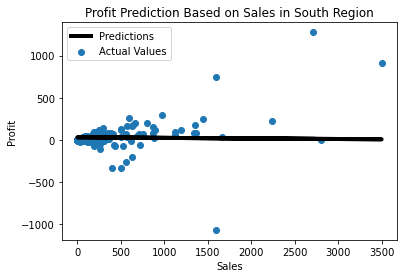

In [21]:
# Visualization of profit prediction based on sales in south region

#Scaling
sc.fit(x_test_south)
x_test_west = sc.transform(x_test_south)

plt.scatter(x_test_south, y_test_south)
plt.plot(x_test_south, prediction_south, 'k', linewidth=4)
plt.legend(["Predictions","Actual Values"])
plt.title('Profit Prediction Based on Sales in South Region')
plt.xlabel('Sales')
plt.ylabel('Profit')

In [22]:
#Predit profit based on sales in deiffernt region
#Central
df_r= df[df['Central']==1]
X = df_r[['Sales']]
Y = df_r[['Profit']]
x_train_central, x_test_central, y_train_central, y_test_central = train_test_split(X, Y, test_size=0.2, random_state=42)

#linear Regression model
model_central = LinearRegression()

#Fit the model using the train data
model_central.fit(x_train_central, y_train_central)

#Store the predictions for the test sets
prediction_central = model_central.predict(x_test_central)

print("score:", model_central.score(y_test_central, prediction_central)) 

score: -0.0862568766152838


Text(0, 0.5, 'Profit')

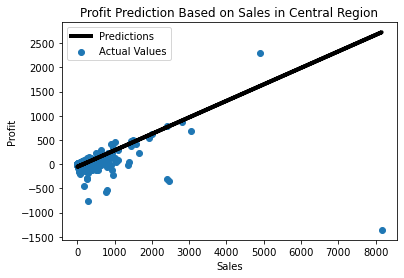

In [23]:
# Visualization of profit prediction based on sales in west region

#Scaling
sc.fit(x_test_central)
x_test_west = sc.transform(x_test_central)

plt.scatter(x_test_central, y_test_central)
plt.plot(x_test_central, prediction_central, 'k', linewidth=4)
plt.legend(["Predictions","Actual Values"])
plt.title('Profit Prediction Based on Sales in Central Region')
plt.xlabel('Sales')
plt.ylabel('Profit')

The KNN model is suitable for categorical or binary vairables, in order to further explore the potential relationship betweeen sales, profit and region, we built a linear regression model and look at how sales affect profit in different regions separately. Because sales and profit are both Continuous variables, a regression model would be the best choice. \
From the visualization, we see that three out of four regions seem to have a positive relationship between sales and profit, that is, as the sales increases, the profit also increases. Only the south region has a negative slope suggesting that the profit would actually decrease when the sales increase. An increase in overhead cost could lead to this situation, expenses like rent, loan payments, and salaries might have increased due to the slow-down development of economy in the south. \
However, the regression model is far from accruate with accuracy socre ranging from 0.08 to -0.08. This suggests that the model seems to be underfitting. The graphs explained one reason for this low accuracy: there appears to be a lot of outliers which do not follow any pattern and thus could noise the model and decrease its predicting accuracy.

## Part 3: Conclusion

Comparing the accuracy scores of two models, we see that the KNN model would be more suitable for discovering the relationship between sales, profit, region (and categories) because region is categorical variable and KNN is widely used to predict categorical data.
The linear regression model demonstrates that in different regions the profit increases at different rate as the sales increase, suggesting that the operating costs for business in different regions are very different. In the south region, the profit would even have a negative growth, and this might be realted to the slow economic growth observed in the south.

Most part of our hypothesis is proved right. The most sales of technology products is indeed in the west, and interestingly, the most sales of furniture products are also located in the west. This might be because in the west region, people prefer to live in suburbs and houses instead of in apartments in the cities like the East region (where is more city oriented). Because houses generally have more spaces than apartments, people would buy more furniture products to fill and decorate their houses. Interestingly, the profit does not grow fast with the increase of sales in the west, the model predicts that the central region is where the profit increase rapidly along with sales. This might due to the fast industrial growth and urbanization of the central region. Because of central's geographic characteristics and histical origins, central has been focusing on agriculture as its main supprt of economy. Recently it paid more attention to industrial and urbanized development. The fixed expenses for business and living expenses remain low at this start point of development, and hence the sales revenue is not reduced much by the expenses of renting, salaries, and other costs.

Unfortunately, due to the low accuracy scores, we conclude that there is no strong correlation between the variables we looked at, regions did not play a significant role in determining the sales and profit. Some potental exploration could be done focusing on the categories of products.
